In [1]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

2023-02-16 20:46:12.209457: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def getData(cfileName):

    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")

    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data


def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y


# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

## iPhone13_I dataset

In [3]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone13/iPhone13_I/"
    if(i==0):
        data = getData(folder_path + "calender-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

[0.015625 +0.015625j  0.       +0.j        0.0078125+0.j        ...
 0.0234375+0.0078125j 0.0234375+0.0078125j 0.03125  -0.0078125j]
2048
77387
(2048, 77387)
[0.01826616 0.00950806 0.00373913 ... 0.00167015 0.00381105 0.00957042]
(10000, 2048)
(10000,)
[0.0078125+0.015625j  0.0078125+0.j        0.015625 +0.j        ...
 0.015625 +0.0234375j 0.015625 +0.j        0.015625 +0.j       ]
2048
81265
(2048, 81265)
[0.01835838 0.00961773 0.00350257 ... 0.00192106 0.00369137 0.00963282]
(20000, 2048)
(20000,)
[0.03125  +0.015625j  0.03125  +0.0078125j 0.015625 +0.0078125j ...
 0.0234375+0.015625j  0.0234375+0.0078125j 0.015625 -0.0078125j]
2048
82947
(2048, 82947)
[0.01815592 0.00944388 0.00397235 ... 0.00185365 0.0036876  0.00957425]
(30000, 2048)
(30000,)
[0.       +0.03125j  0.       +0.j       0.015625 +0.j       ...
 0.015625 -0.015625j 0.0234375+0.015625j 0.0078125+0.015625j]
2048
82654
(2048, 82654)
[0.01825963 0.00967498 0.00359683 ... 0.00195847 0.00358379 0.01038325]
(40000, 2048)
(40

## Cross-model Validation

## iPhone13_I(ii) model

Cross-model Validation without training

In [11]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I(ii)_model.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [12]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 15s 5ms/step - loss: 13.5012 - accuracy: 0.0690
test loss, test acc: [13.501206398010254, 0.06900999695062637]


In [13]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 12s 4ms/step
[[    0  2992     0  5311   285     0     0     0     0  1412]
 [    0  2431     0     1  4089   188     6     1     0  3284]
 [    1   198     0     0  1573  3717   422    11     0  4078]
 [    0     7     0     0     0  9622   348     5     2    16]
 [    0  3397     0     0  4282   784    89    15     0  1433]
 [    1  2262     0     2  7035   188    13    13     0   486]
 [    0  3966     0  1064    90     0     0     0     0  4880]
 [ 9985     0     1     1     1     0     0     0    12     0]
 [    1  2673  2610    12  3531     2     0  1170     0     1]
 [    0     0     0     0     0     0     0     0 10000     0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.14      0.24      0.17     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.21      0.43      0

Test Accuracy:0.06901


Text(0.5, 1.0, 'Accuracy:0.069')

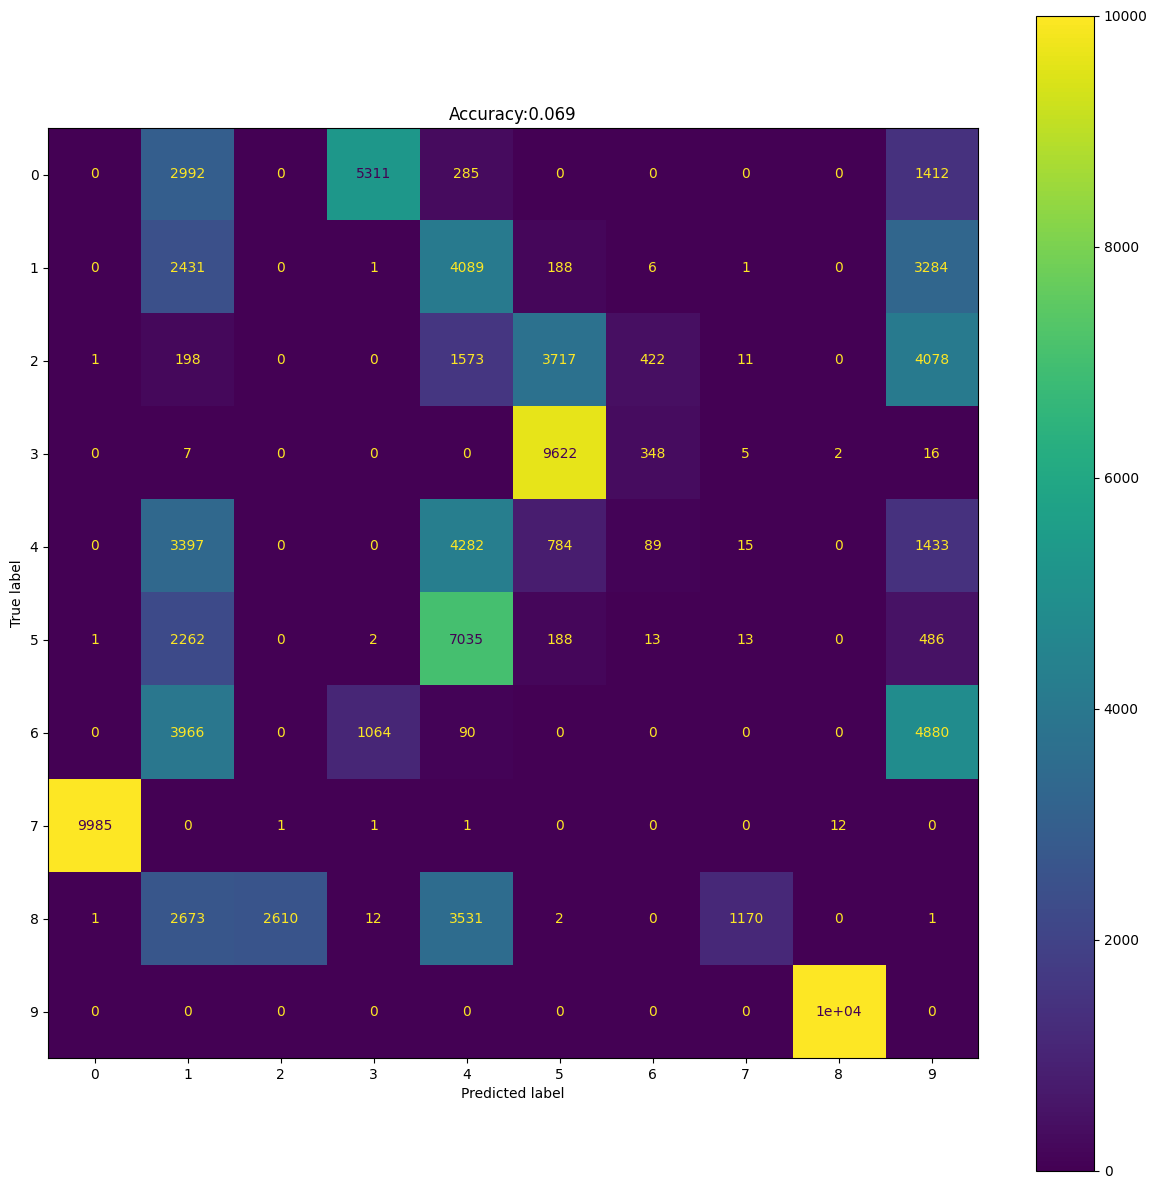

In [14]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [15]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [16]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.8672 - accuracy: 0.4831
Epoch 2/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.8775 - accuracy: 0.6313
Epoch 3/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.7368 - accuracy: 0.7028
Epoch 4/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.6517 - accuracy: 0.7869
Epoch 5/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.5964 - accuracy: 0.7960
Epoch 6/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.5624 - accuracy: 0.8031
Epoch 7/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.5392 - accuracy: 0.8074
Epoch 8/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.5215 - accuracy: 0.8112
Epoch 9/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.5069 - accuracy: 0.8142
Epoch 10/30
3125/3125 [==============================] - 13s 4ms/step - l

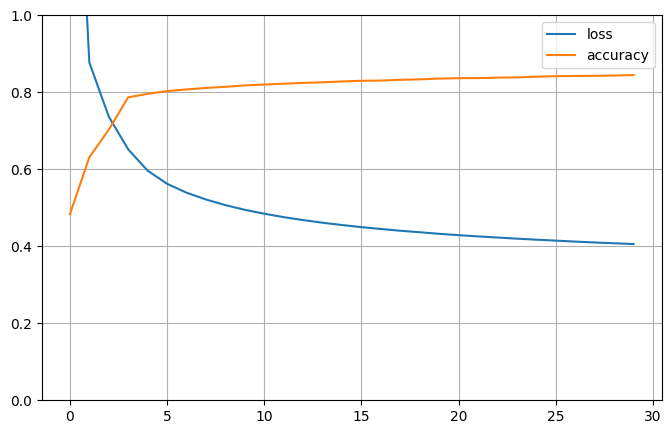

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [17]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 0.4034 - accuracy: 0.8458
test loss, test acc: [0.40340426564216614, 0.84579998254776]


In [19]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[ 8619     1     0     0     0     0  1380     0     0     0]
 [    2  6671   540     0   939  1819    24     0     5     0]
 [    1   546  8282   107   773   284     4     1     2     0]
 [    1     0    68  9923     5     0     1     0     2     0]
 [    2  1177   865    13  6259  1619     1     0    64     0]
 [    2  1662   284     1  1726  6147     7     0   171     0]
 [ 1111     5     0     0     0     0  8884     0     0     0]
 [    1     0     0     0     0     0     0  9995     4     0]
 [    1     0     1     0    28   167     0     3  9800     0]
 [    0     0     0     0     0     0     0     0     0 10000]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     10000
           1       0.66      0.67      0.67     10000
           2       0.82      0.83      0.83     10000
           3       0.99      0.99      0.99     10000
           4       0.64      0.63      0

Test Accuracy:0.8458


Text(0.5, 1.0, 'Accuracy:0.846')

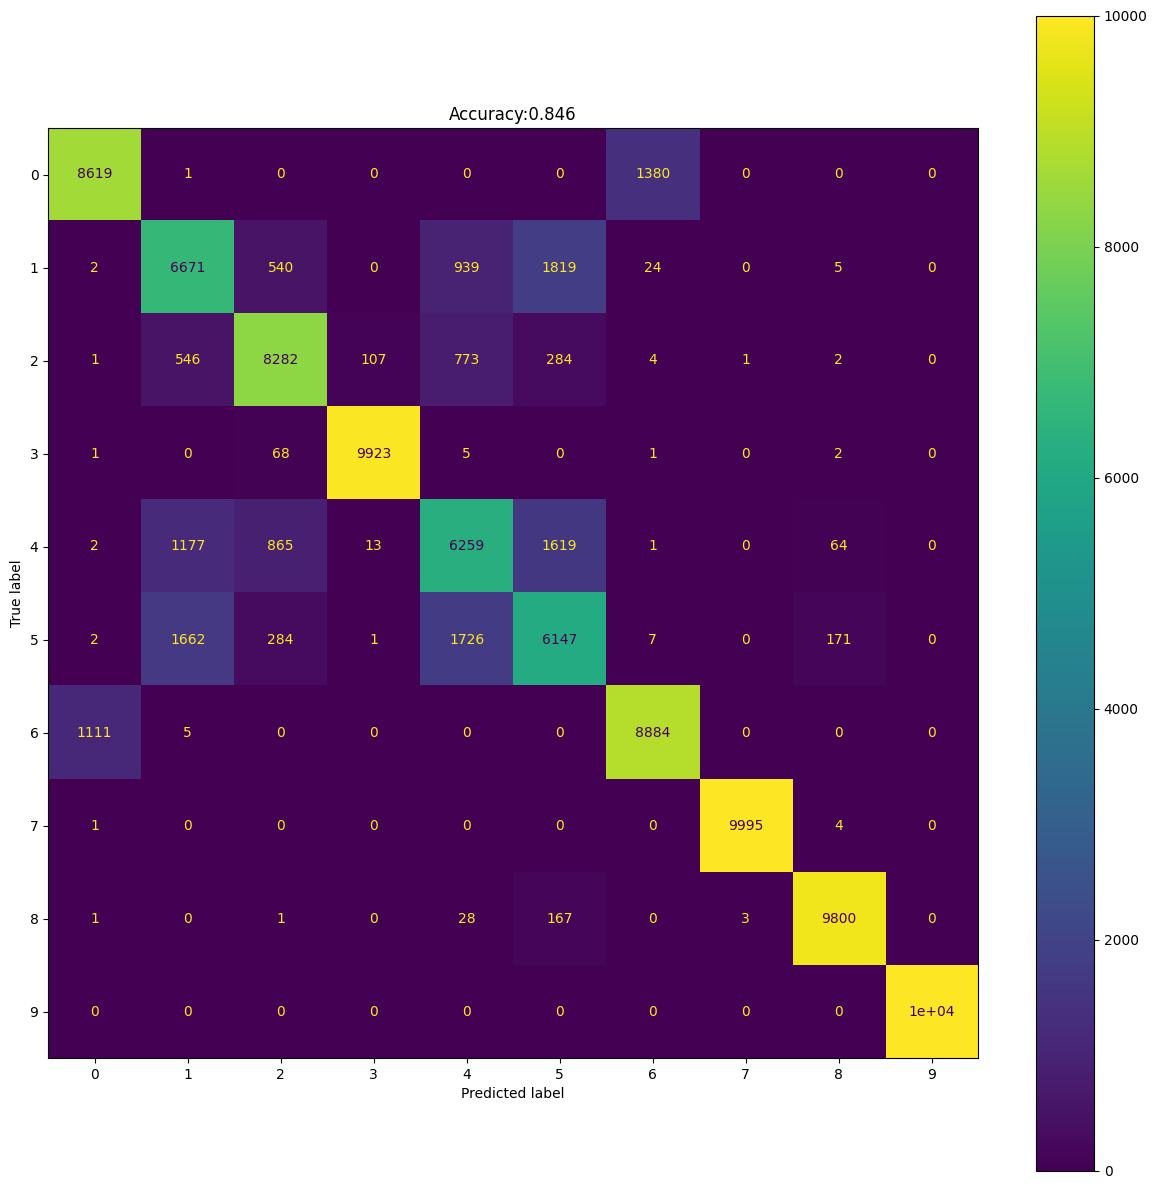

In [20]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I(iii) model

Cross-model Validation without training

In [21]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I(iii)_model.h5")
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [22]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 15s 5ms/step - loss: 11.0497 - accuracy: 0.0131
test loss, test acc: [11.049732208251953, 0.013059999793767929]


In [23]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 5ms/step
[[    0     0  2506  7494     0     0     0     0     0     0]
 [   96   144  2539  7205     0     0    15     0     0     1]
 [  437    44  1161  8321     0     0    36     1     0     0]
 [ 8214     0     0     1     0  1637     8   139     0     1]
 [   20   134  3677  6165     0     0     4     0     0     0]
 [   99   360  4211  5291     0     0    39     0     0     0]
 [    2     0  2360  7638     0     0     0     0     0     0]
 [    0   719     0     2  8911    50   318     0     0     0]
 [  287   896  1835  6950     0     1    30     1     0     0]
 [    0     0     0     0     0     0     0     0 10000     0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.06      0.01      0.02     10000
           2       0.06      0.12      0.08     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0

Test Accuracy:0.01306


Text(0.5, 1.0, 'Accuracy:0.013')

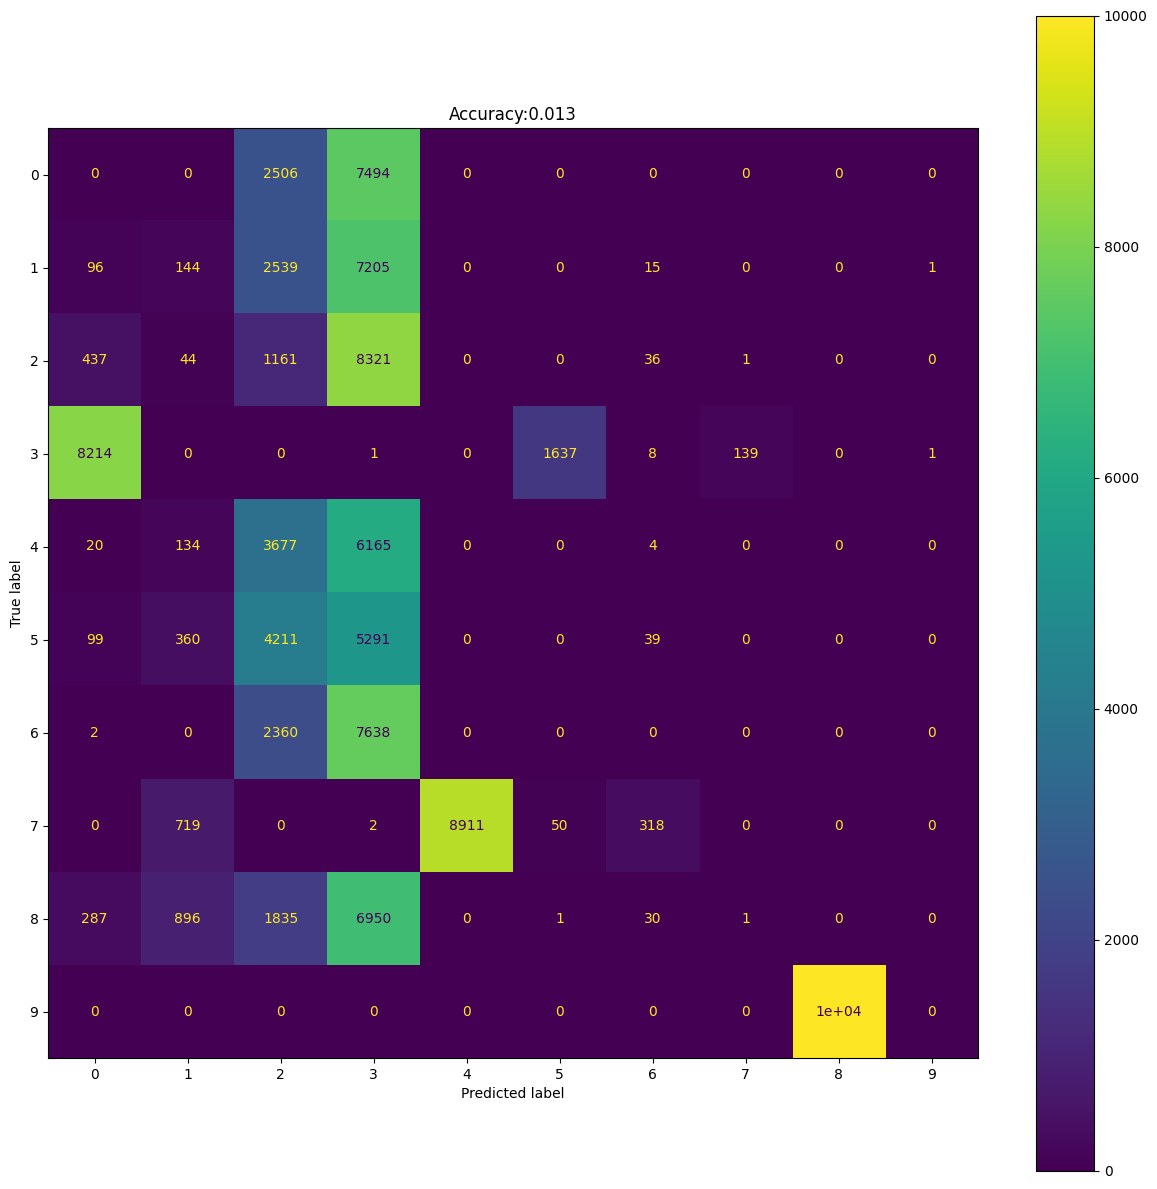

In [24]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [25]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [26]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 15s 5ms/step - loss: 2.1380 - accuracy: 0.3674
Epoch 2/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.9977 - accuracy: 0.6065
Epoch 3/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.8801 - accuracy: 0.6393
Epoch 4/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.8239 - accuracy: 0.6581
Epoch 5/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.7887 - accuracy: 0.6696
Epoch 6/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.7639 - accuracy: 0.6799
Epoch 7/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.7456 - accuracy: 0.6911
Epoch 8/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.7314 - accuracy: 0.6974
Epoch 9/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.7198 - accuracy: 0.7029
Epoch 10/30
3125/3125 [==============================] - 14s 4ms/step - l

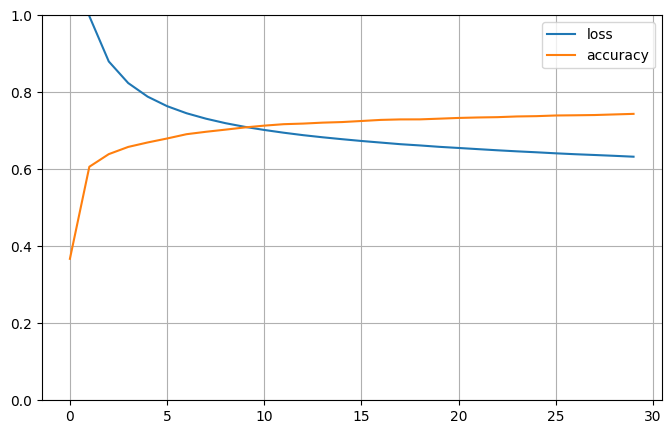

In [27]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [28]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 4ms/step - loss: 0.6346 - accuracy: 0.7429
test loss, test acc: [0.6345906853675842, 0.7429100275039673]


In [29]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[ 6571    52     1     0     1     1  3374     0     0     0]
 [    3  7478  1018     0   366   812    80     0   243     0]
 [    2  1811  6120    12   743   643    36     0   633     0]
 [    1     0     7  9990     0     0     0     0     0     2]
 [    3   828  1056     0  6087   788    93     0  1145     0]
 [    2  3243  1170     1  1112  3681    35     0   756     0]
 [ 2748   134     3     0     9     1  7104     0     1     0]
 [    0     0     0     6     0     1     1  9991     1     0]
 [    1   282   746     4  1170   522     6     0  7269     0]
 [    0     0     0     0     0     0     0     0     0 10000]]
              precision    recall  f1-score   support

           0       0.70      0.66      0.68     10000
           1       0.54      0.75      0.63     10000
           2       0.60      0.61      0.61     10000
           3       1.00      1.00      1.00     10000
           4       0.64      0.61      0

Test Accuracy:0.74291


Text(0.5, 1.0, 'Accuracy:0.743')

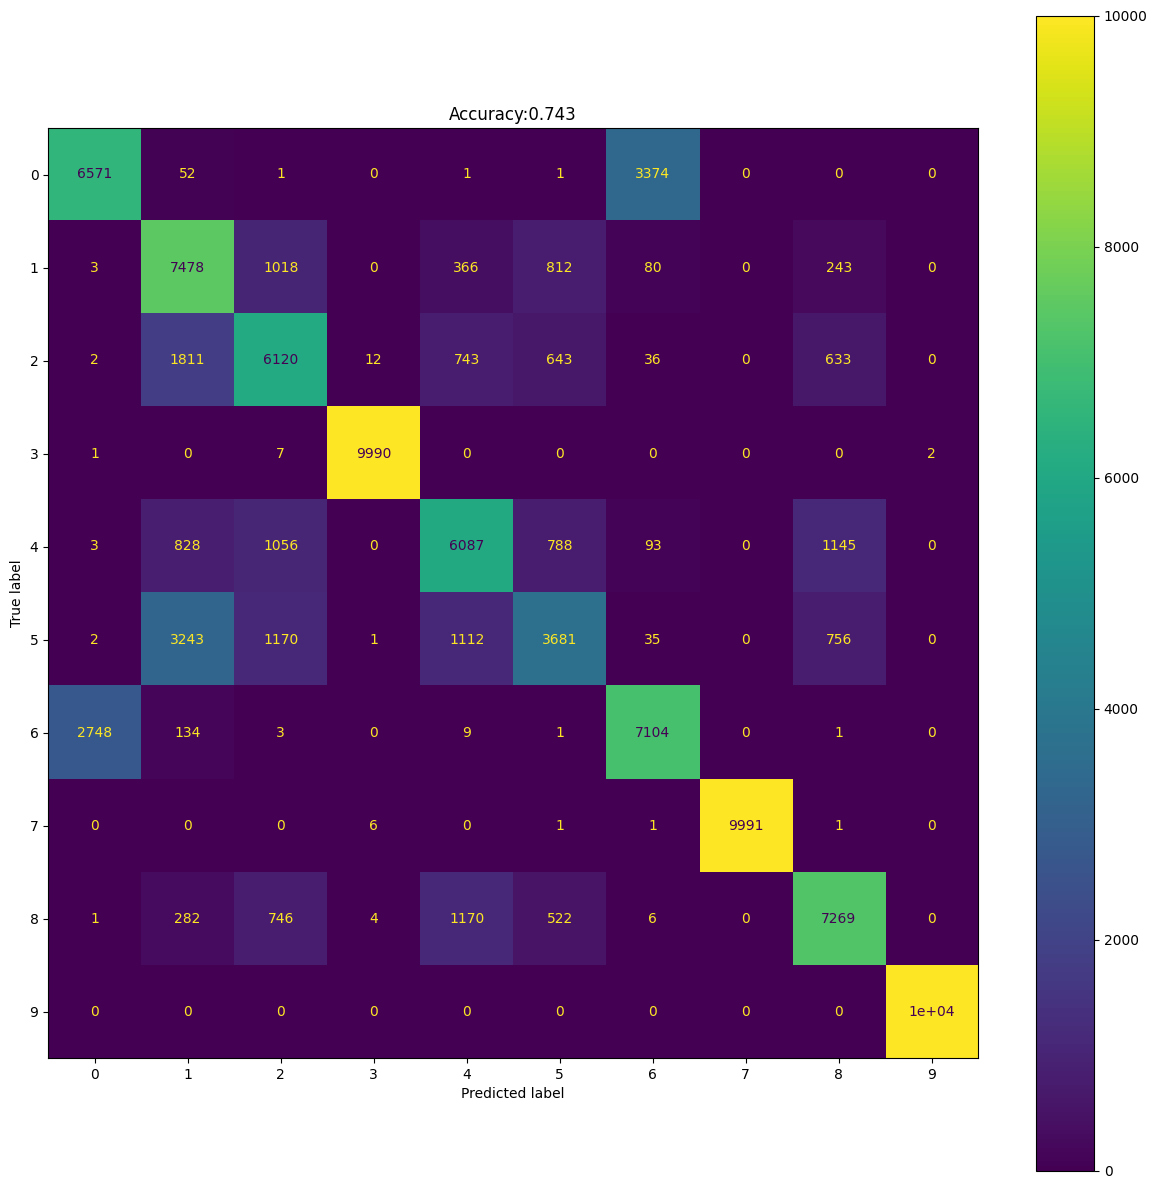

In [30]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I_Besh model

Cross-model Validation without training

In [31]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_BeSh_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [32]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 16s 5ms/step - loss: 13.4741 - accuracy: 0.0978
test loss, test acc: [13.47414493560791, 0.09775000065565109]


In [33]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[    0     0     0     0     0    36  2334     0  7630     0]
 [    0   368     0     0  3359     1     1  3757     0  2514]
 [    0   597     0     0  2572     1     1  1911     1  4917]
 [    0     0  3307     0     0     2     1  6091     0   599]
 [    0    10     0     0   106     1     1  7392     0  2490]
 [    0    22     0     0  1340     2     1  7817     1   817]
 [    0   244     0     0     0     0  9287     0   469     0]
 [    0     1  9982     5     0     0     0    11     1     0]
 [    0     0     0     0     0     0     1  9737     1   261]
 [10000     0     0     0     0     0     0     0     0     0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.30      0.04      0.07     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.01      0.01      0

Test Accuracy:0.09775


Text(0.5, 1.0, 'Accuracy:0.098')

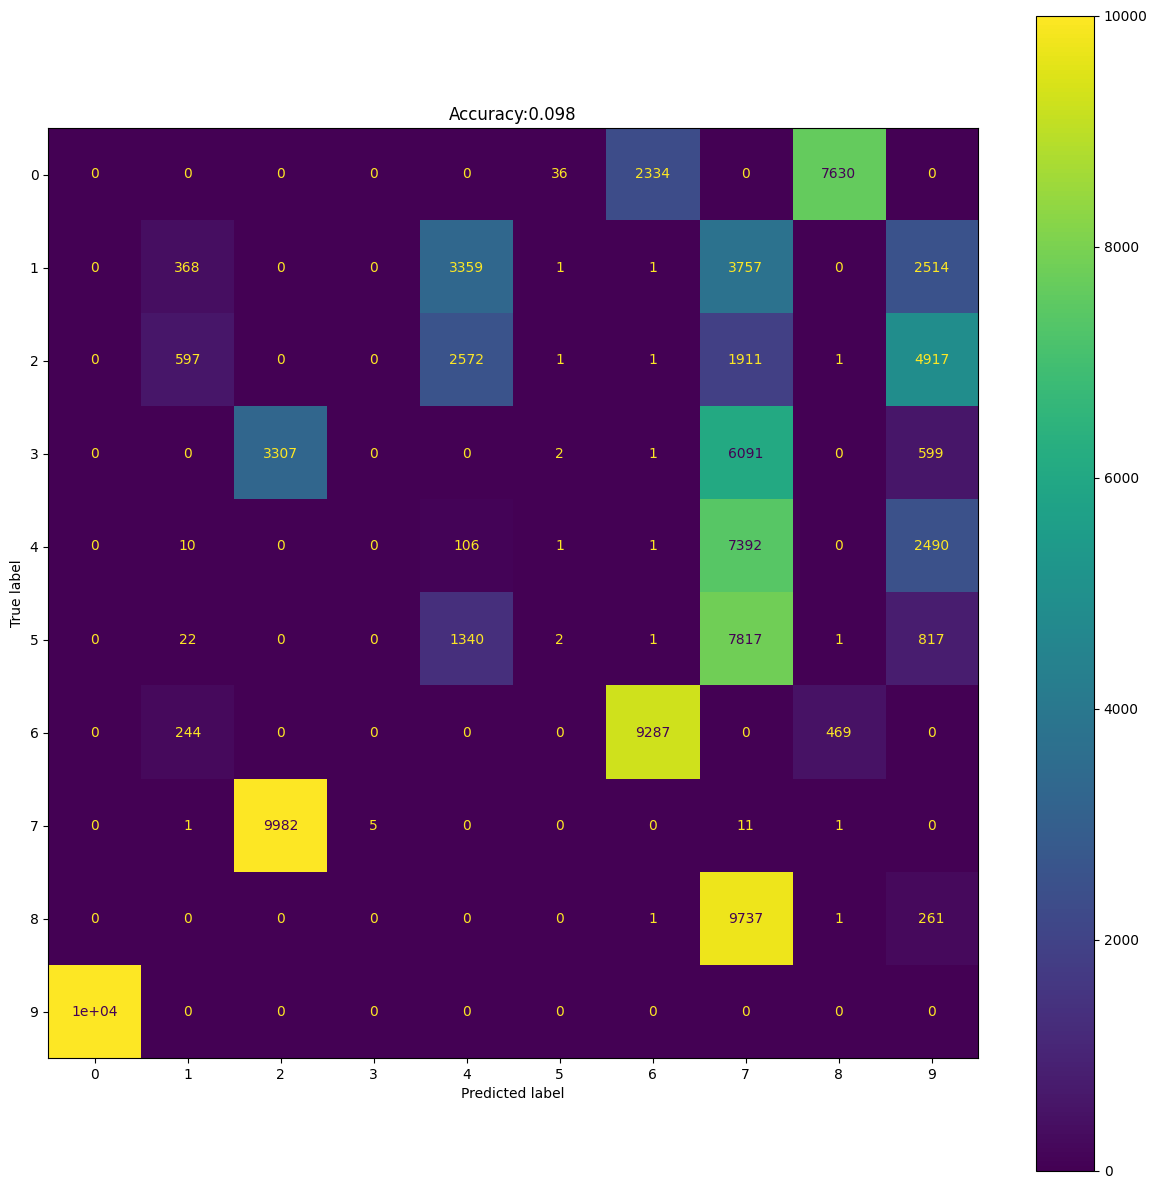

In [34]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [35]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-trai

In [36]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 16s 5ms/step - loss: 1.4931 - accuracy: 0.5455
Epoch 2/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.7236 - accuracy: 0.7114
Epoch 3/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.6458 - accuracy: 0.7436
Epoch 4/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.6101 - accuracy: 0.7596
Epoch 5/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.5879 - accuracy: 0.7685
Epoch 6/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.5719 - accuracy: 0.7740
Epoch 7/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.5592 - accuracy: 0.7806
Epoch 8/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.5491 - accuracy: 0.7845
Epoch 9/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.5414 - accuracy: 0.7867
Epoch 10/30
3125/3125 [==============================] - 11s 4ms/step - l

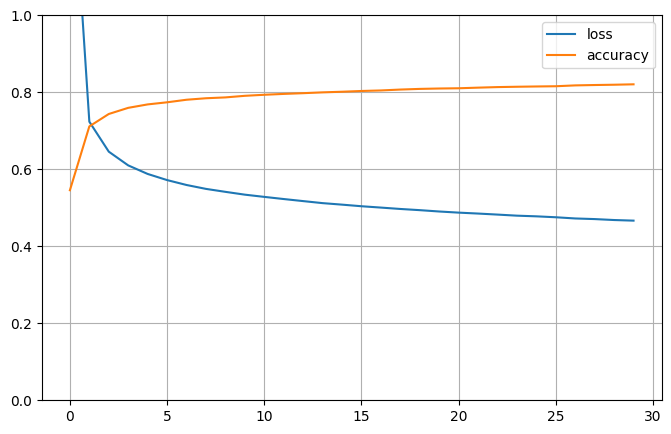

In [37]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [38]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 4ms/step - loss: 0.4671 - accuracy: 0.8223
test loss, test acc: [0.4670987129211426, 0.8222500085830688]


In [39]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[ 9021     0     0     0     0     0   979     0     0     0]
 [    2  6346  2475     0   631   512     0     0    34     0]
 [    2  1551  7498     0   699   235     0     0    15     0]
 [    2     0    11  9919    58     2     1     2     5     0]
 [    1   712   777     6  6919   690     1     0   894     0]
 [    3  2008  1031     2  2289  4268     0     0   399     0]
 [  694     9     0     0     0     0  9297     0     0     0]
 [    1     0     0     1     0     0     1  9997     0     0]
 [    0    56     1     4   824   154     1     0  8960     0]
 [    0     0     0     0     0     0     0     0     0 10000]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91     10000
           1       0.59      0.63      0.61     10000
           2       0.64      0.75      0.69     10000
           3       1.00      0.99      1.00     10000
           4       0.61      0.69      0

Test Accuracy:0.82225


Text(0.5, 1.0, 'Accuracy:0.822')

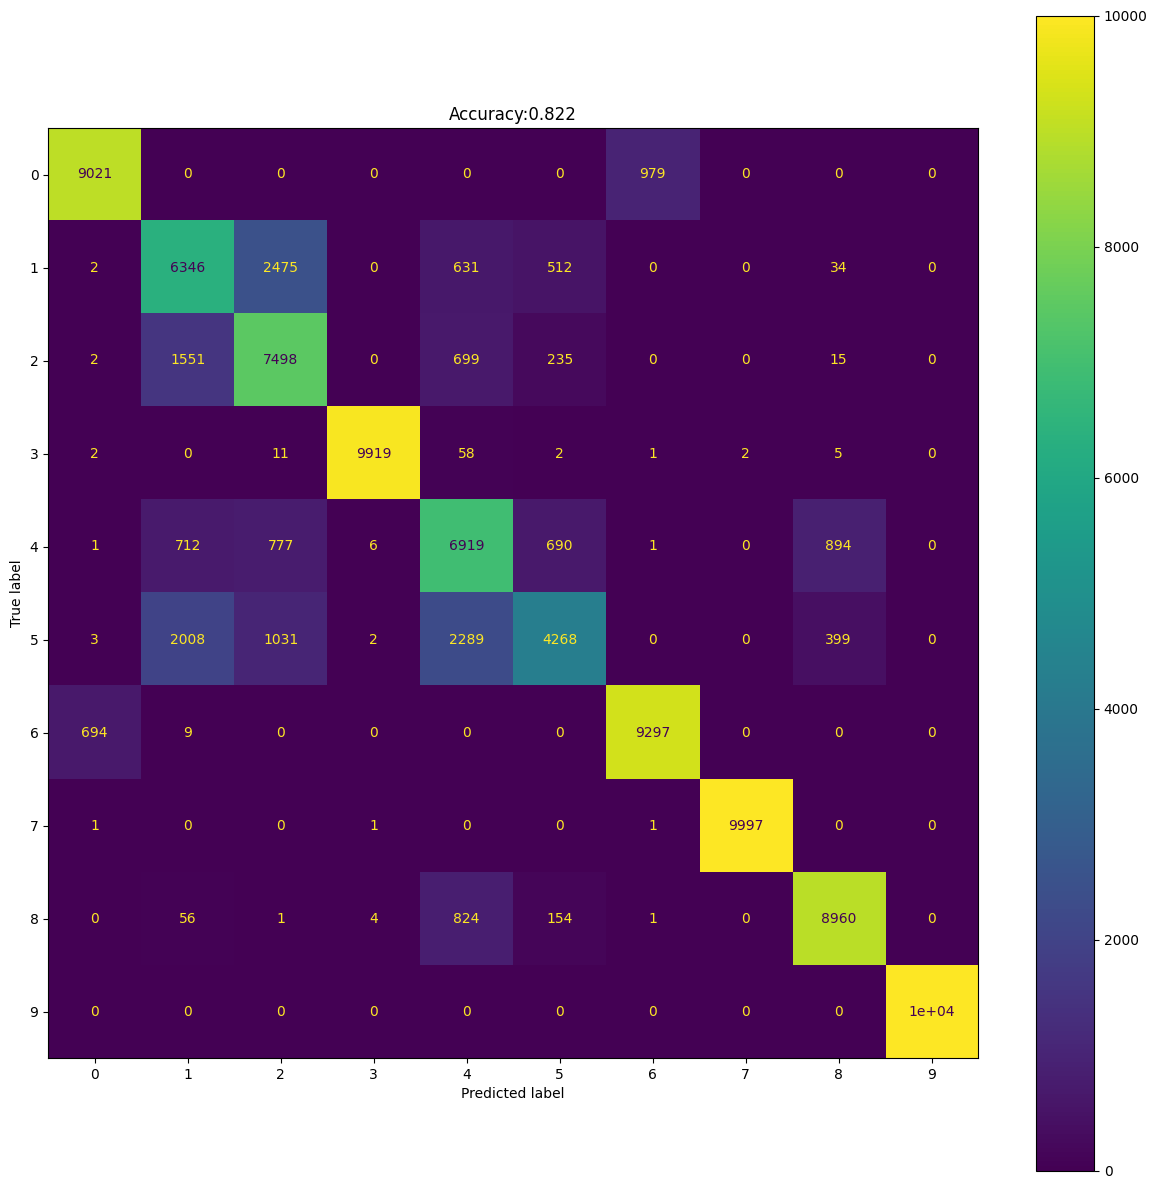

In [40]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I_data1 model

Cross-model Validation without training

In [41]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_data1_model.h5")
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_25 (Dense)            (None, 800)               1120800   
                                                                 
 dense_26 (Dense)            (None, 500)               400500    
                                                                 
 dense_27 (Dense)            (None, 200)               100200    
                                                                 
 dense_28 (Dense)            (None, 100)               20100     
                                                                 
 dense_29 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [42]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 19s 6ms/step - loss: 9.1158 - accuracy: 0.1334
test loss, test acc: [9.115754127502441, 0.1334100067615509]


In [43]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 12s 4ms/step
[[10000     0     0     0     0     0     0     0     0     0]
 [ 1653  3107     0  2025     0  2460   615   140     0     0]
 [  232  1438     0   505     0  5972  1369   478     0     6]
 [    2     0     0     0     0     2    13    44  6920  3019]
 [   75  7184     1  1552     0   790    67   331     0     0]
 [   58  5739     6  3825     0   232    40   100     0     0]
 [10000     0     0     0     0     0     0     0     0     0]
 [    2     0     1     0  9995     0     0     2     0     0]
 [   14  3658    17  4725     3   215   192  1176     0     0]
 [    0     0     0     0     0     0     0     0 10000     0]]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62     10000
           1       0.15      0.31      0.20     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0

Test Accuracy:0.13341


Text(0.5, 1.0, 'Accuracy:0.133')

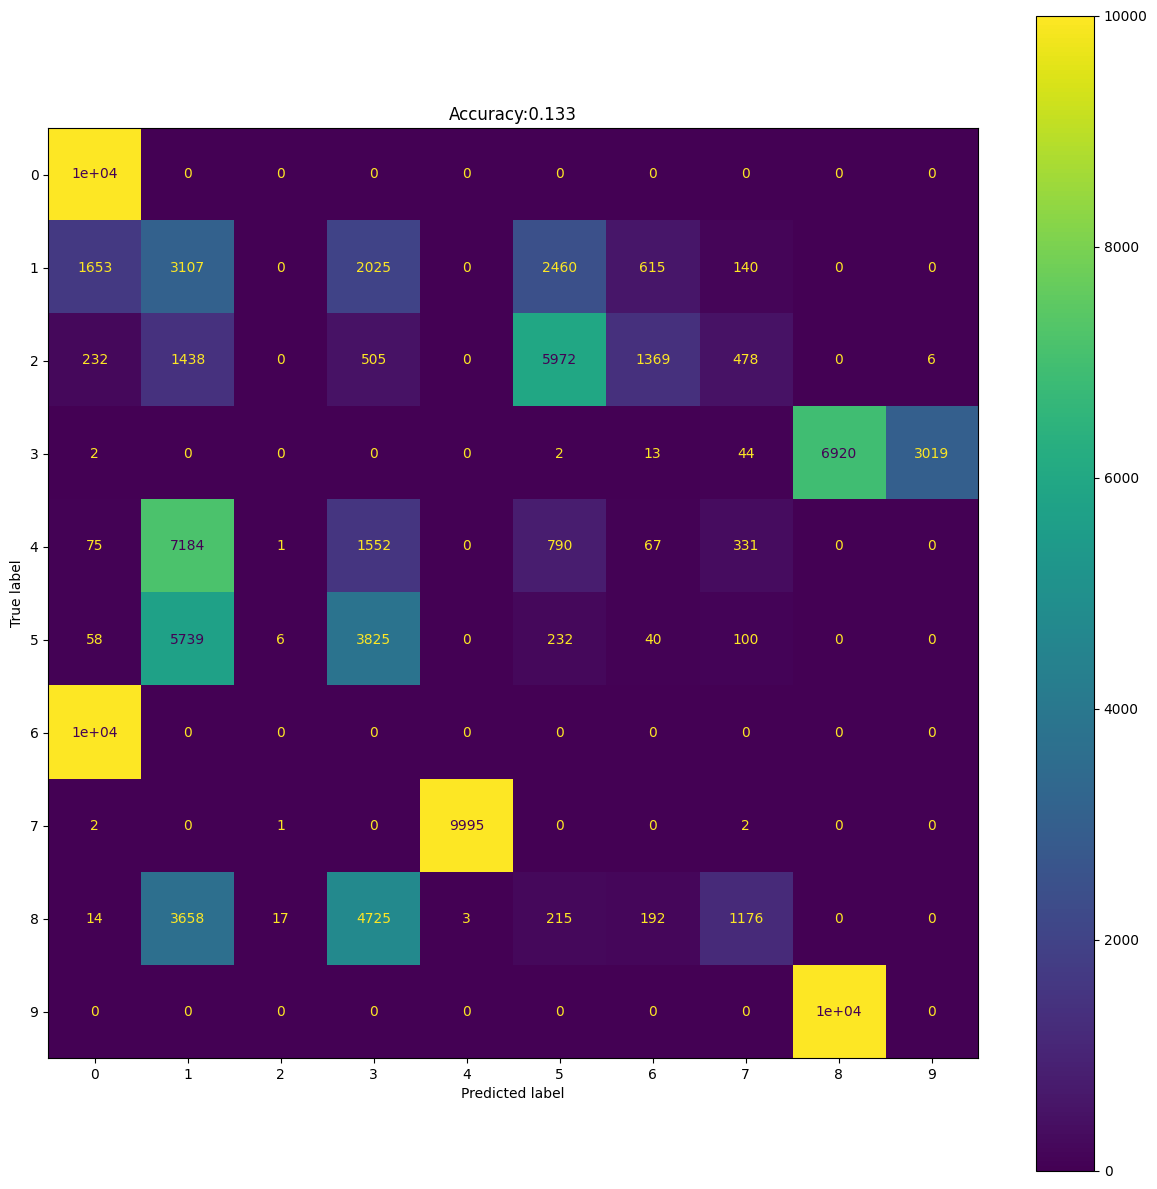

In [44]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [45]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_25 (Dense)            (None, 800)               1120800   
                                                                 
 dense_26 (Dense)            (None, 500)               400500    
                                                                 
 dense_27 (Dense)            (None, 200)               100200    
                                                                 
 dense_28 (Dense)            (None, 100)               20100     
                                                                 
 dense_29 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [46]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 16s 5ms/step - loss: 1.7830 - accuracy: 0.4203
Epoch 2/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.9087 - accuracy: 0.6450
Epoch 3/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.8101 - accuracy: 0.7047
Epoch 4/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.7508 - accuracy: 0.7240
Epoch 5/30
3125/3125 [==============================] - 17s 5ms/step - loss: 0.7118 - accuracy: 0.7345
Epoch 6/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.6845 - accuracy: 0.7405
Epoch 7/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.6646 - accuracy: 0.7456
Epoch 8/30
3125/3125 [==============================] - 17s 5ms/step - loss: 0.6494 - accuracy: 0.7488
Epoch 9/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.6373 - accuracy: 0.7528
Epoch 10/30
3125/3125 [==============================] - 13s 4ms/step - l

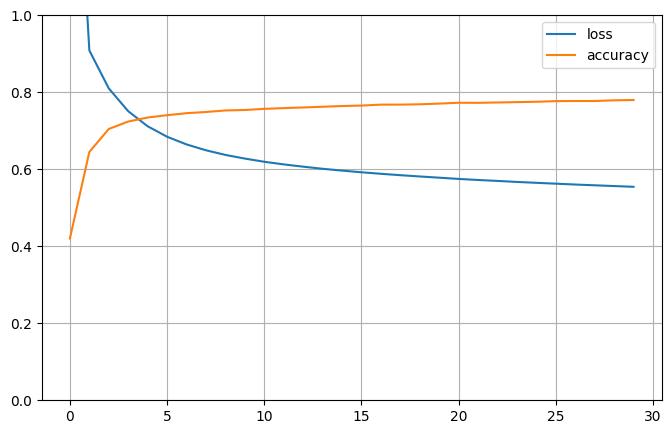

In [47]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [48]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 16s 4ms/step - loss: 0.5521 - accuracy: 0.7809
test loss, test acc: [0.5520534515380859, 0.7809200286865234]


In [49]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[ 7862     0     0     0     0     0  2138     0     0     0]
 [    1  6374  1473     0   953   660     6     0   533     0]
 [    2  1422  7614    10   409   198     1     0   344     0]
 [    2     0     7  9991     0     0     0     0     0     0]
 [    1  1047   504     1  5780  1718     0     0   949     0]
 [    2   863   222     0  2081  5550     0     0  1282     0]
 [ 2184     0     0     0     0     0  7816     0     0     0]
 [    1     1     0     1     0     0     0  9994     0     3]
 [    1   559   369     3   884  1072     0     1  7111     0]
 [    0     0     0     0     0     0     0     0     0 10000]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.78     10000
           1       0.62      0.64      0.63     10000
           2       0.75      0.76      0.75     10000
           3       1.00      1.00      1.00     10000
           4       0.57      0.58      0

Test Accuracy:0.78092


Text(0.5, 1.0, 'Accuracy:0.781')

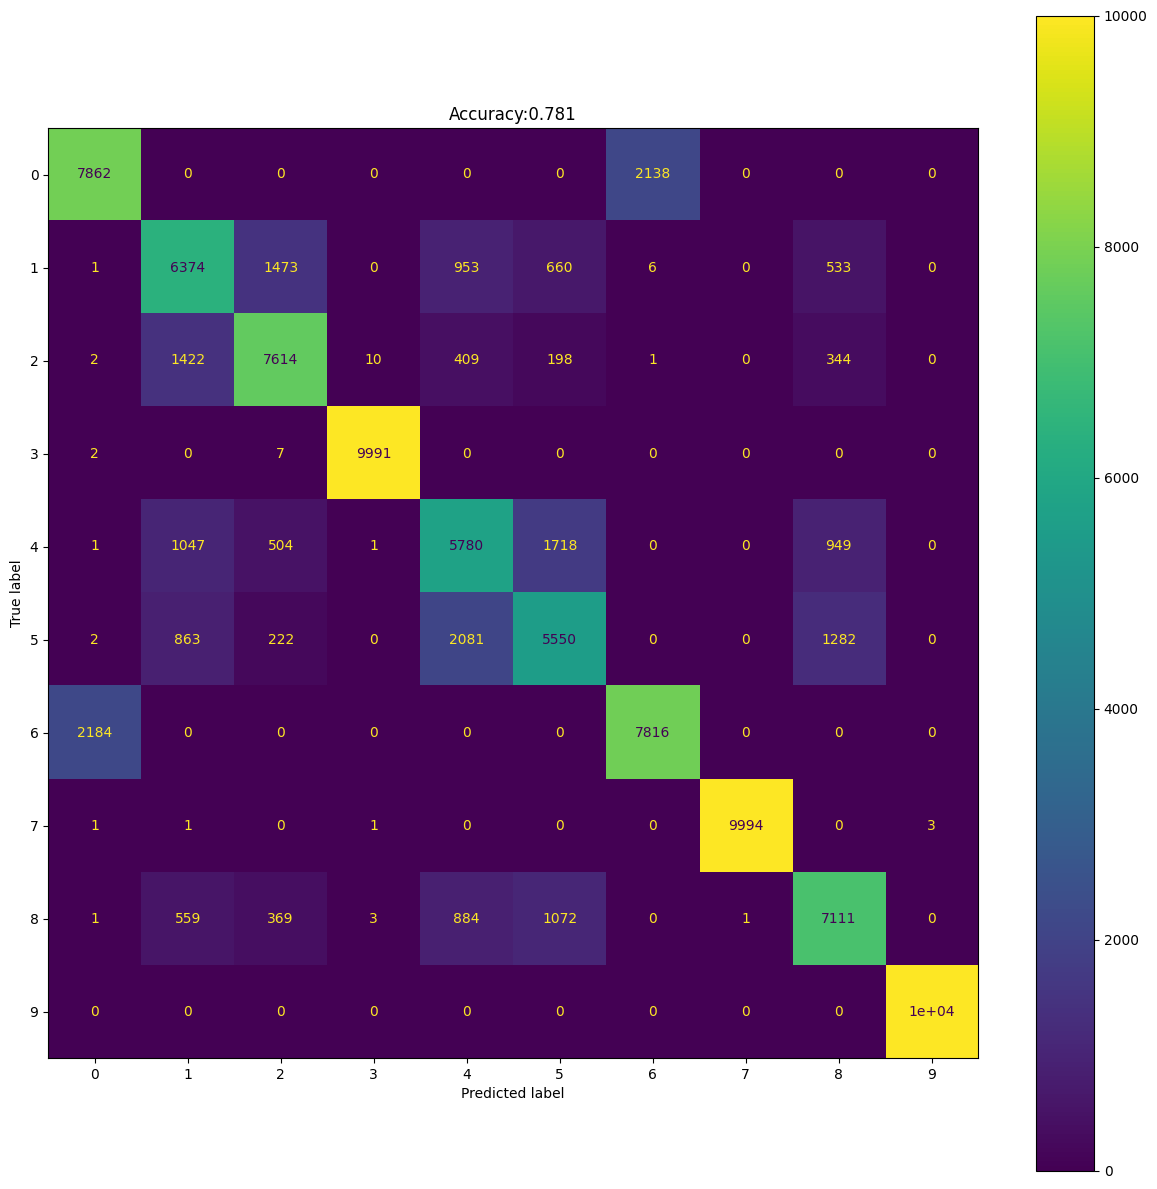

In [50]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I_data2 model

Cross-model Validation without training

In [51]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_data2_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [52]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 17s 5ms/step - loss: 7.3785 - accuracy: 0.2507
test loss, test acc: [7.3785223960876465, 0.2506699860095978]


In [53]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[ 9842     0     0     0     0   158     0     0     0     0]
 [ 4516  4054   291    78   744    10     0     0   306     1]
 [ 1157  2811   845  1921     1   716     0     0  2081   468]
 [    1     0  2649     1     0     1    51     0     0  7297]
 [  967  6901  1388   237   305     7     0     0   191     4]
 [  547  7818  1009     5   124    11    12     0   459    15]
 [ 9916     0     0     4     0    79     0     0     1     0]
 [    1     0     0     1     0     1     1  9996     0     0]
 [  303  3797  5604     4   272     2     4     0    13     1]
 [    0     0     0     0     0     0     0 10000     0     0]]
              precision    recall  f1-score   support

           0       0.36      0.98      0.53     10000
           1       0.16      0.41      0.23     10000
           2       0.07      0.08      0.08     10000
           3       0.00      0.00      0.00     10000
           4       0.21      0.03      0

Test Accuracy:0.25067


Text(0.5, 1.0, 'Accuracy:0.251')

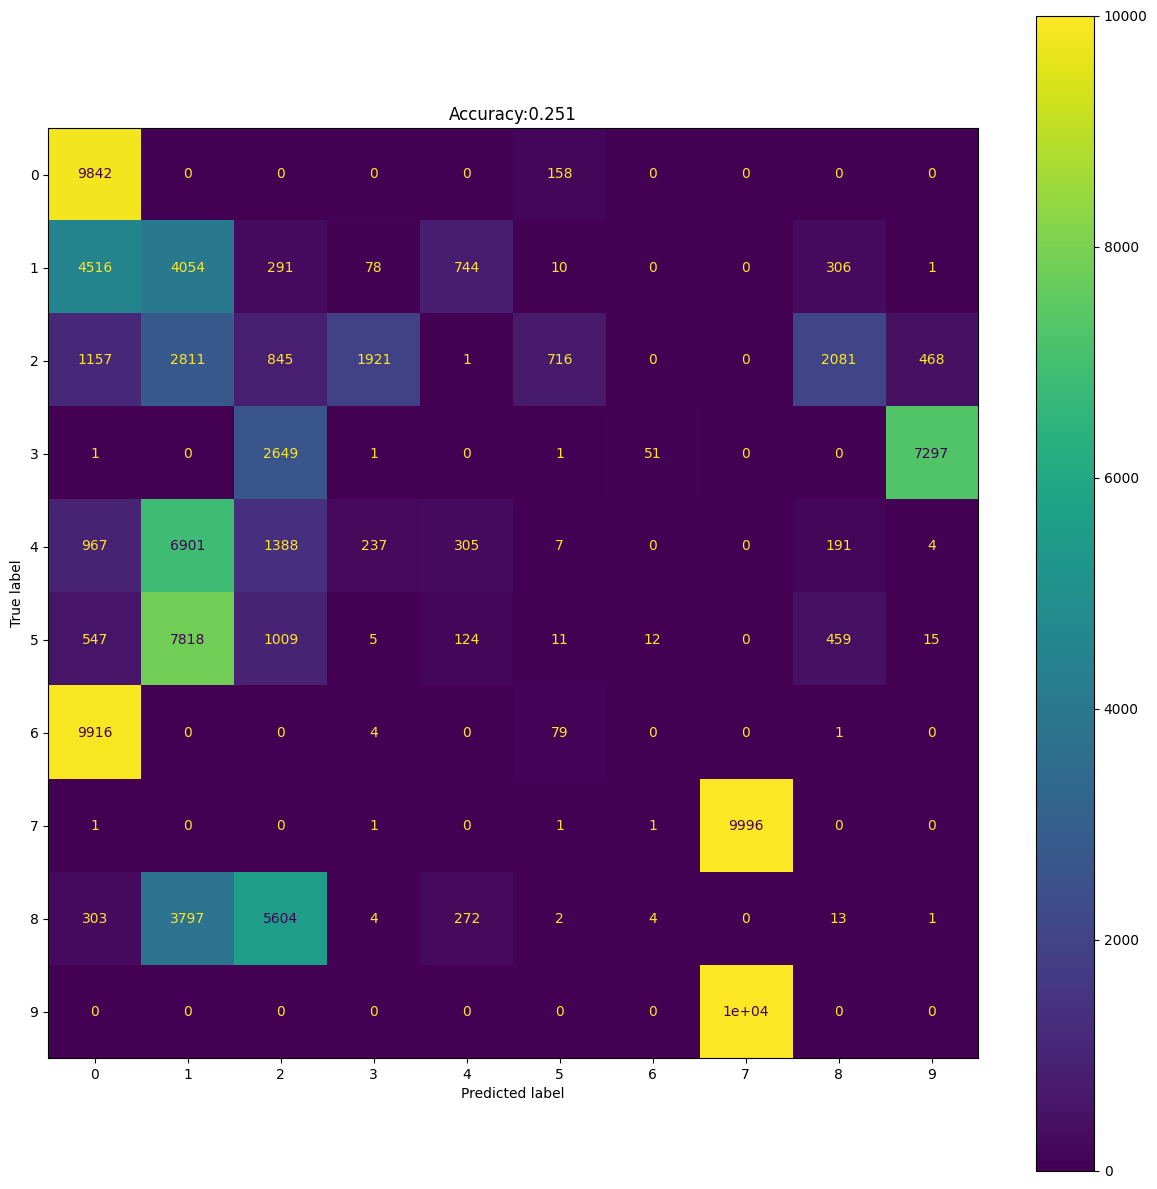

In [54]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [55]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-trai

In [56]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 14s 4ms/step - loss: 1.7424 - accuracy: 0.4457
Epoch 2/30
3125/3125 [==============================] - 18s 6ms/step - loss: 0.8538 - accuracy: 0.6263
Epoch 3/30
3125/3125 [==============================] - 22s 7ms/step - loss: 0.7389 - accuracy: 0.7546
Epoch 4/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.6784 - accuracy: 0.7722
Epoch 5/30
3125/3125 [==============================] - 17s 5ms/step - loss: 0.6397 - accuracy: 0.7823
Epoch 6/30
3125/3125 [==============================] - 18s 6ms/step - loss: 0.6125 - accuracy: 0.7890
Epoch 7/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.5914 - accuracy: 0.7939
Epoch 8/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.5747 - accuracy: 0.7975
Epoch 9/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.5613 - accuracy: 0.8003
Epoch 10/30
3125/3125 [==============================] - 13s 4ms/step - l

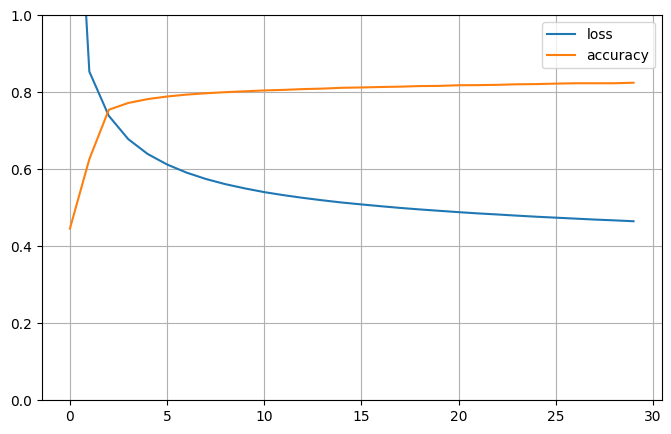

In [57]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [58]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 15s 5ms/step - loss: 0.4645 - accuracy: 0.8255
test loss, test acc: [0.46451640129089355, 0.8254899978637695]


In [59]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[ 8074     0     0     0     0     0  1926     0     0     0]
 [    1  7699   392     0   592  1029    11     0   276     0]
 [    2   602  8204    10   638   495     2     0    47     0]
 [    0     0     2  9993     0     0     2     0     3     0]
 [    1   928   640     3  6213  1049     4     0  1162     0]
 [    2  1281   357     3   844  6618     0     0   895     0]
 [ 1967     3     1     0     0     0  8029     0     0     0]
 [    0     1     0     0     1     1     0  9997     0     0]
 [    1   228    35     3  1128   881     1     1  7722     0]
 [    0     0     0     0     0     0     0     0     0 10000]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.81     10000
           1       0.72      0.77      0.74     10000
           2       0.85      0.82      0.84     10000
           3       1.00      1.00      1.00     10000
           4       0.66      0.62      0

Test Accuracy:0.82549


Text(0.5, 1.0, 'Accuracy:0.825')

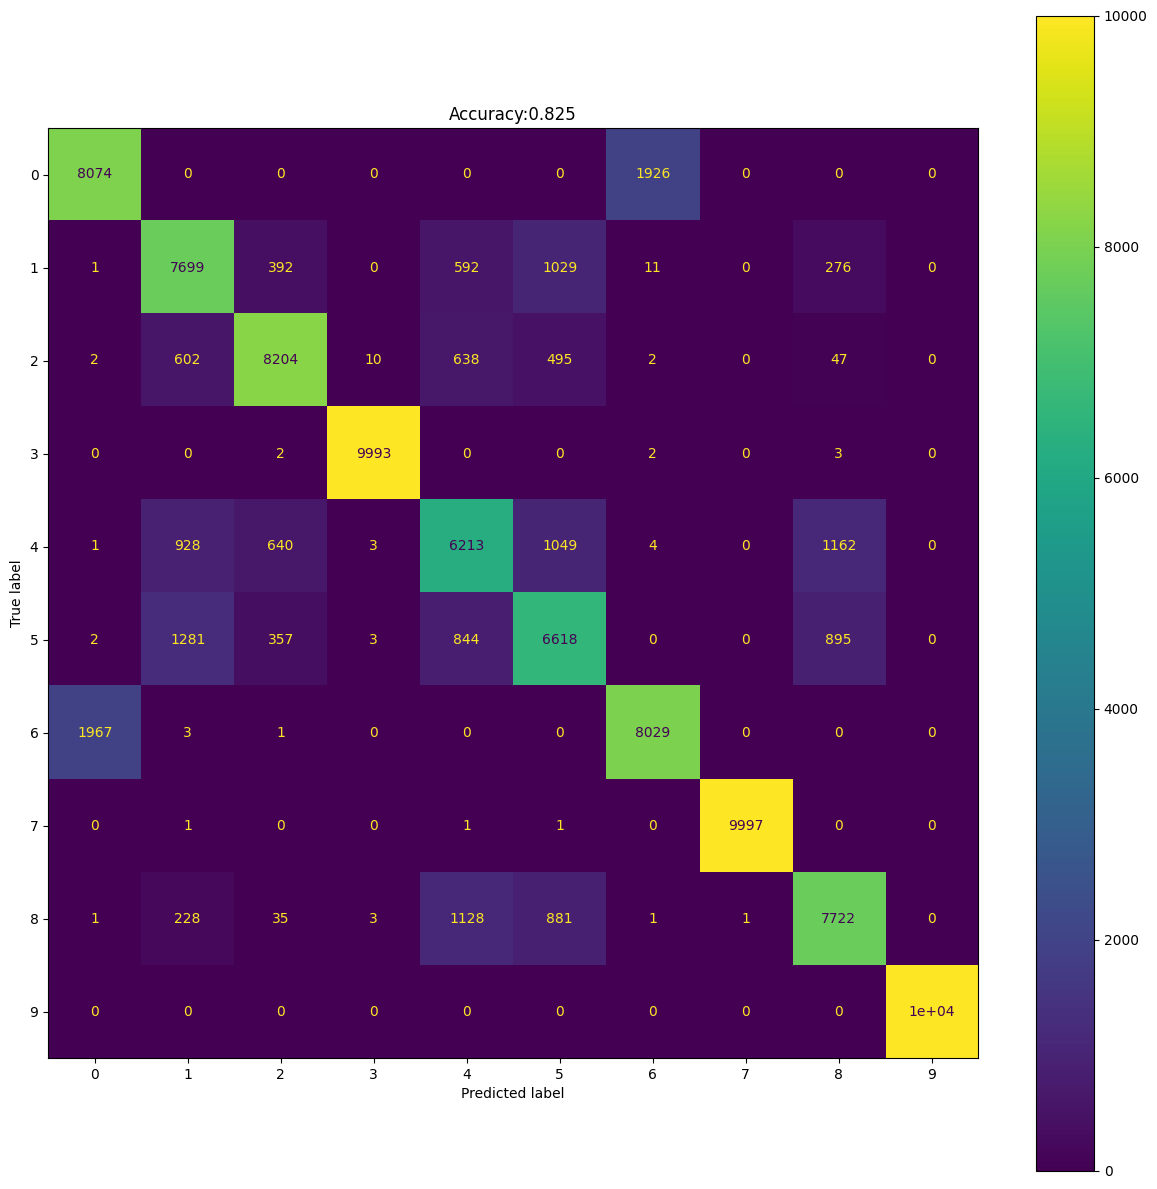

In [60]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_II model

Cross-model Validation without training

In [28]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_II_model.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [29]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 8.6814 - accuracy: 0.0818
test loss, test acc: [8.681355476379395, 0.0817900002002716]


In [30]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 12s 4ms/step
[[    0     0     0     0  9990     0     0     0     0    10]
 [    0   635     0     0     2  7937     0     0   470   956]
 [    0    79     0     0     0  7780    15     0     9  2117]
 [    0     0  5191     0     0  4738    67     1     0     3]
 [    0  1385     0     0     1  7704     0     0   815    95]
 [    0  2943     0     0     3  6524     0     0   462    68]
 [    1     0     0     0  9806     0     0     0    18   175]
 [    0     1     0  8985     1     1     0  1012     0     0]
 [    0  9530     0     4     1   455     0     1     7     2]
 [10000     0     0     0     0     0     0     0     0     0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.04      0.06      0.05     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0

Test Accuracy:0.08179


Text(0.5, 1.0, 'Accuracy:0.082')

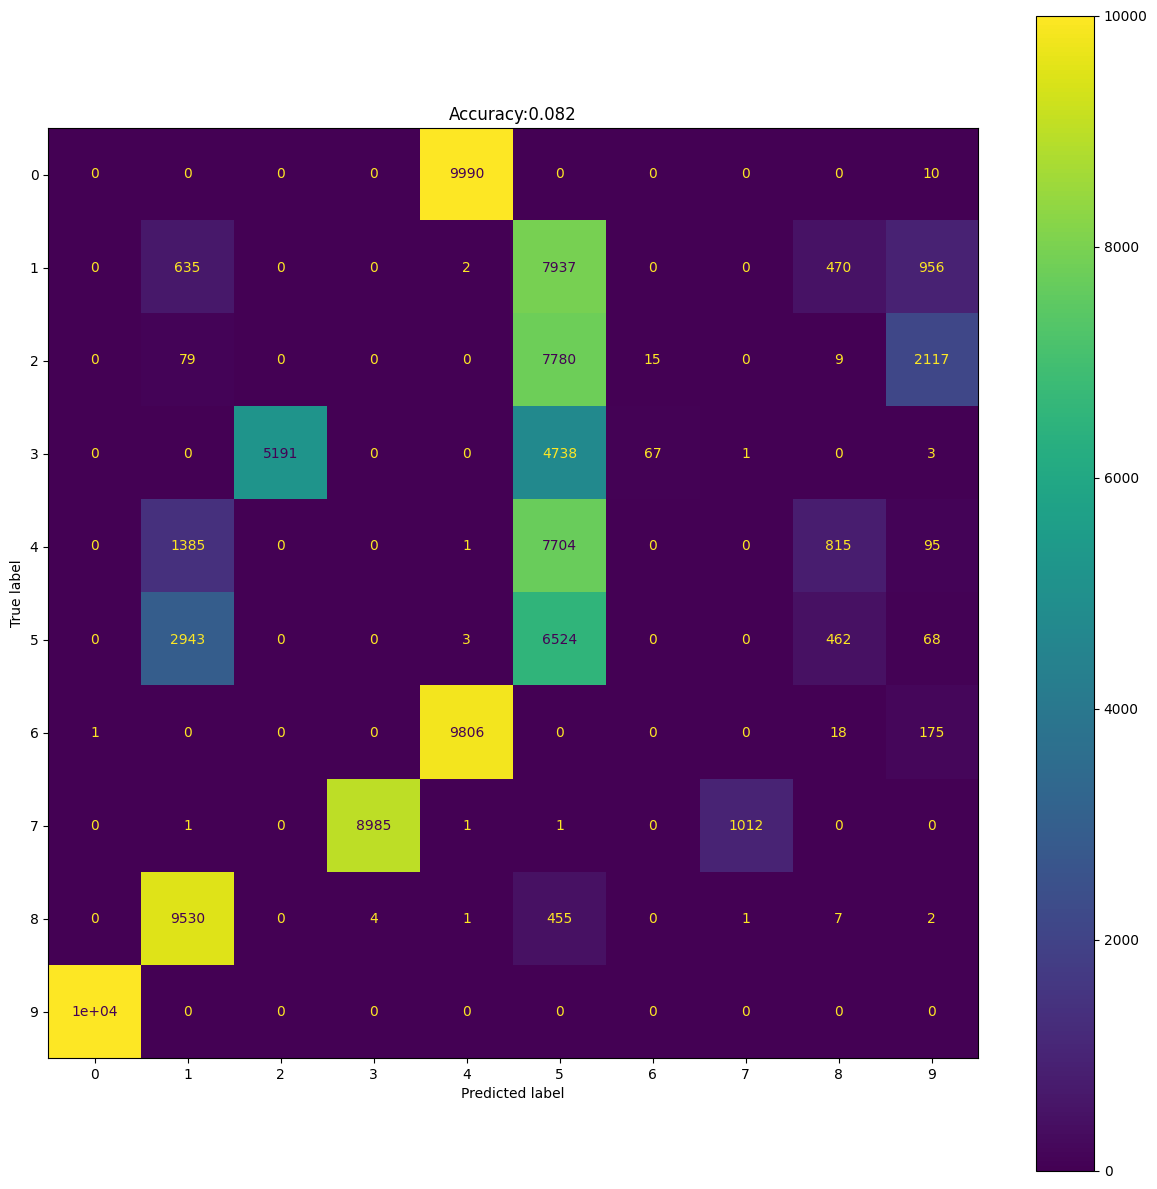

In [31]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [32]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [33]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.5460 - accuracy: 0.5053
Epoch 2/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.6557 - accuracy: 0.7328
Epoch 3/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.5832 - accuracy: 0.7625
Epoch 4/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.5528 - accuracy: 0.7731
Epoch 5/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.5349 - accuracy: 0.7797
Epoch 6/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.5228 - accuracy: 0.7848
Epoch 7/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.5138 - accuracy: 0.7875
Epoch 8/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.5070 - accuracy: 0.7893
Epoch 9/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.5015 - accuracy: 0.7917
Epoch 10/30
3125/3125 [==============================] - 13s 4ms/step - l

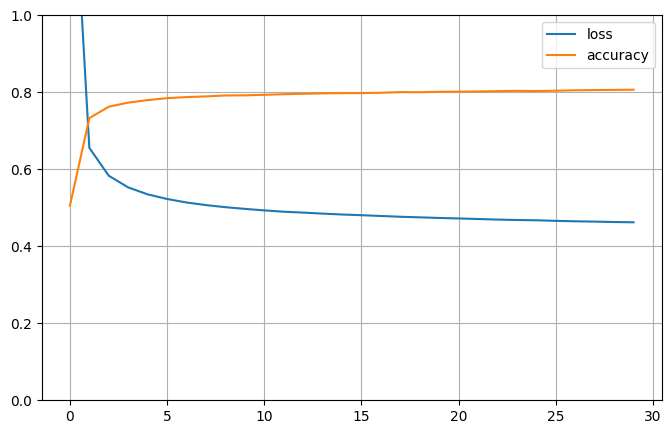

In [34]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [35]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 12s 4ms/step - loss: 0.4597 - accuracy: 0.8092
test loss, test acc: [0.4597492516040802, 0.809220016002655]


In [36]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 12s 4ms/step
[[ 8534     0     0     0     0     0  1466     0     0     0]
 [    2  4989  1808     4  1942  1197     0     0    58     0]
 [    1  1435  8103     7   194   242     1     0    17     0]
 [    1     0     4  9993     1     0     0     0     0     1]
 [    1  1648   338     0  5297  2518     0     0   198     0]
 [    3  1109   268     0  2082  5977     1     1   559     0]
 [ 1405     0     0     0     0     0  8595     0     0     0]
 [    1     0     1     0     0     0     0  9997     1     0]
 [    1    10    25     0    40   487     0     0  9437     0]
 [    0     0     0     0     0     0     0     0     0 10000]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86     10000
           1       0.54      0.50      0.52     10000
           2       0.77      0.81      0.79     10000
           3       1.00      1.00      1.00     10000
           4       0.55      0.53      0

Test Accuracy:0.80922


Text(0.5, 1.0, 'Accuracy:0.809')

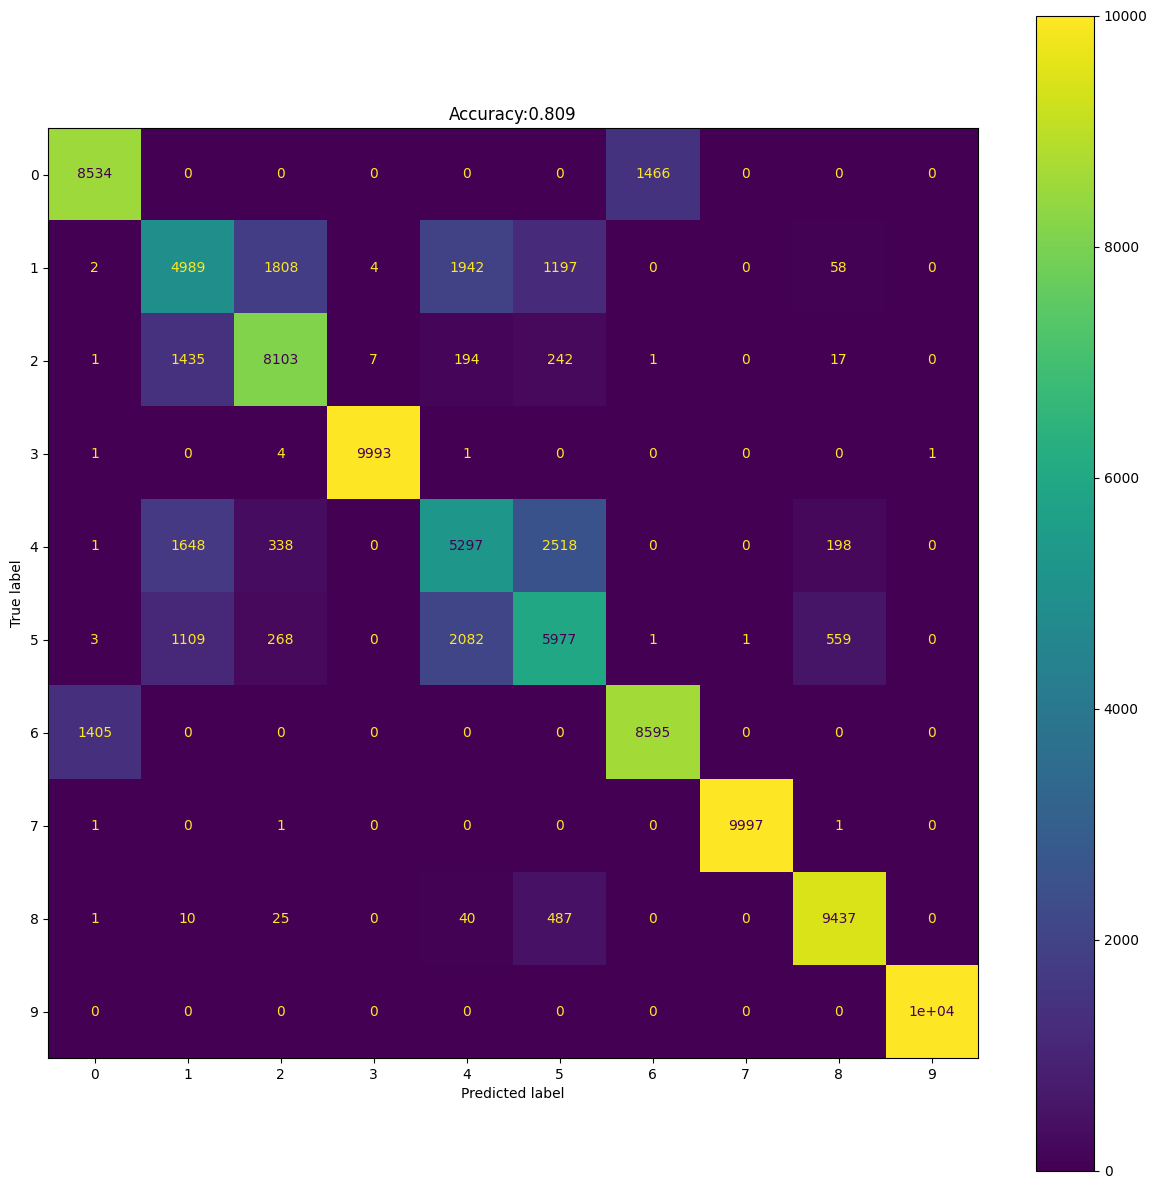

In [37]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_III model

In [41]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_III_model.h5")
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [42]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 15s 5ms/step - loss: 16.9594 - accuracy: 0.1001
test loss, test acc: [16.95939826965332, 0.10005000233650208]


In [43]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 11s 4ms/step
[[    0     0     1     0     0    74    79  3995  5851     0]
 [    0     0     0     0     0     1     9     1  9988     1]
 [    0     1     0     1     0     0     8     1  9989     0]
 [    0     0     0     0     0     1     3     0  9994     2]
 [    0     0     0     1     0     1     0     0  9998     0]
 [    0     1     1     1     0     0     9     0  9987     1]
 [    0     1     1     0     0     0    11   470  9517     0]
 [    0     0     0     0     0     0     8     0  9992     0]
 [    0     1     0     0     0     0     5     0  9994     0]
 [    0     0     0     0     0     0     0 10000     0     0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0

Test Accuracy:0.10005


Text(0.5, 1.0, 'Accuracy:0.100')

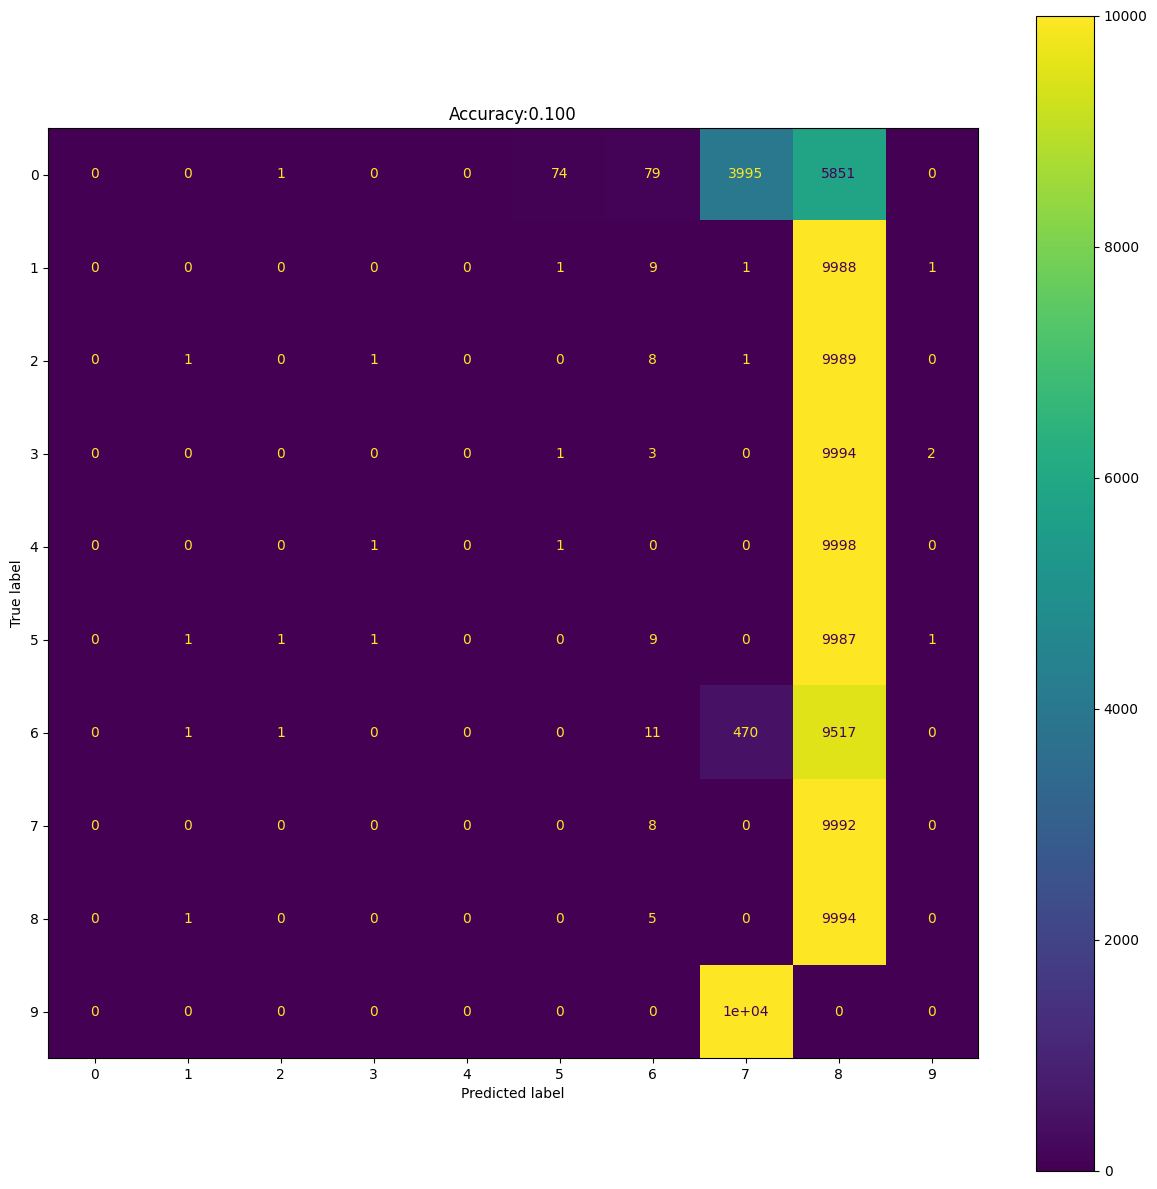

In [44]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [45]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [46]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 13s 4ms/step - loss: 2.0429 - accuracy: 0.2675
Epoch 2/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.5485 - accuracy: 0.4971
Epoch 3/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.4010 - accuracy: 0.5694
Epoch 4/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.2969 - accuracy: 0.6065
Epoch 5/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.2179 - accuracy: 0.6308
Epoch 6/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.1548 - accuracy: 0.6475
Epoch 7/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.1037 - accuracy: 0.6592
Epoch 8/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.0612 - accuracy: 0.6698
Epoch 9/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.0255 - accuracy: 0.6785
Epoch 10/30
3125/3125 [==============================] - 11s 3ms/step - l

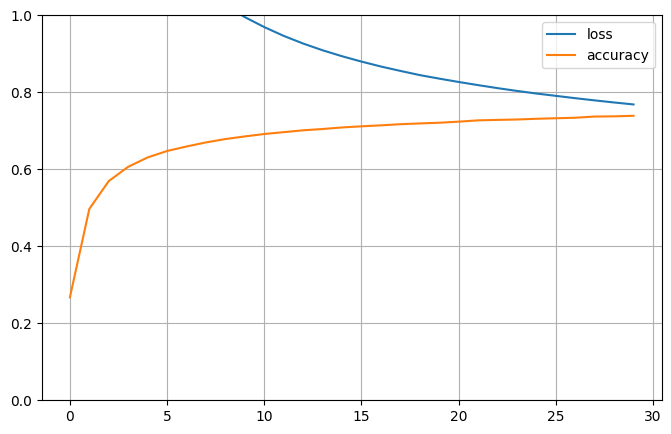

In [47]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [48]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 12s 4ms/step - loss: 0.7659 - accuracy: 0.7400
test loss, test acc: [0.7658780217170715, 0.7400299906730652]


In [49]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 12s 4ms/step
[[ 9544     0     1     0     0     0   455     0     0     0]
 [    3  3320  1297   259   563  2522    11     4  2021     0]
 [    3   466  6946   654   465  1236     9     0   221     0]
 [    3     1   152  9564    44   123     5     9    99     0]
 [    3   292  1229   469  3643  1691     9     8  2656     0]
 [    4   981  1189   360   850  4495     9     3  2109     0]
 [  296     4    47     0     0     0  9653     0     0     0]
 [    1     1     0     4     0     0     9  9978     7     0]
 [    1   295   233   408   751  1430    10    12  6860     0]
 [    0     0     0     0     0     0     0     0     0 10000]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     10000
           1       0.62      0.33      0.43     10000
           2       0.63      0.69      0.66     10000
           3       0.82      0.96      0.88     10000
           4       0.58      0.36      0

Test Accuracy:0.74003


Text(0.5, 1.0, 'Accuracy:0.740')

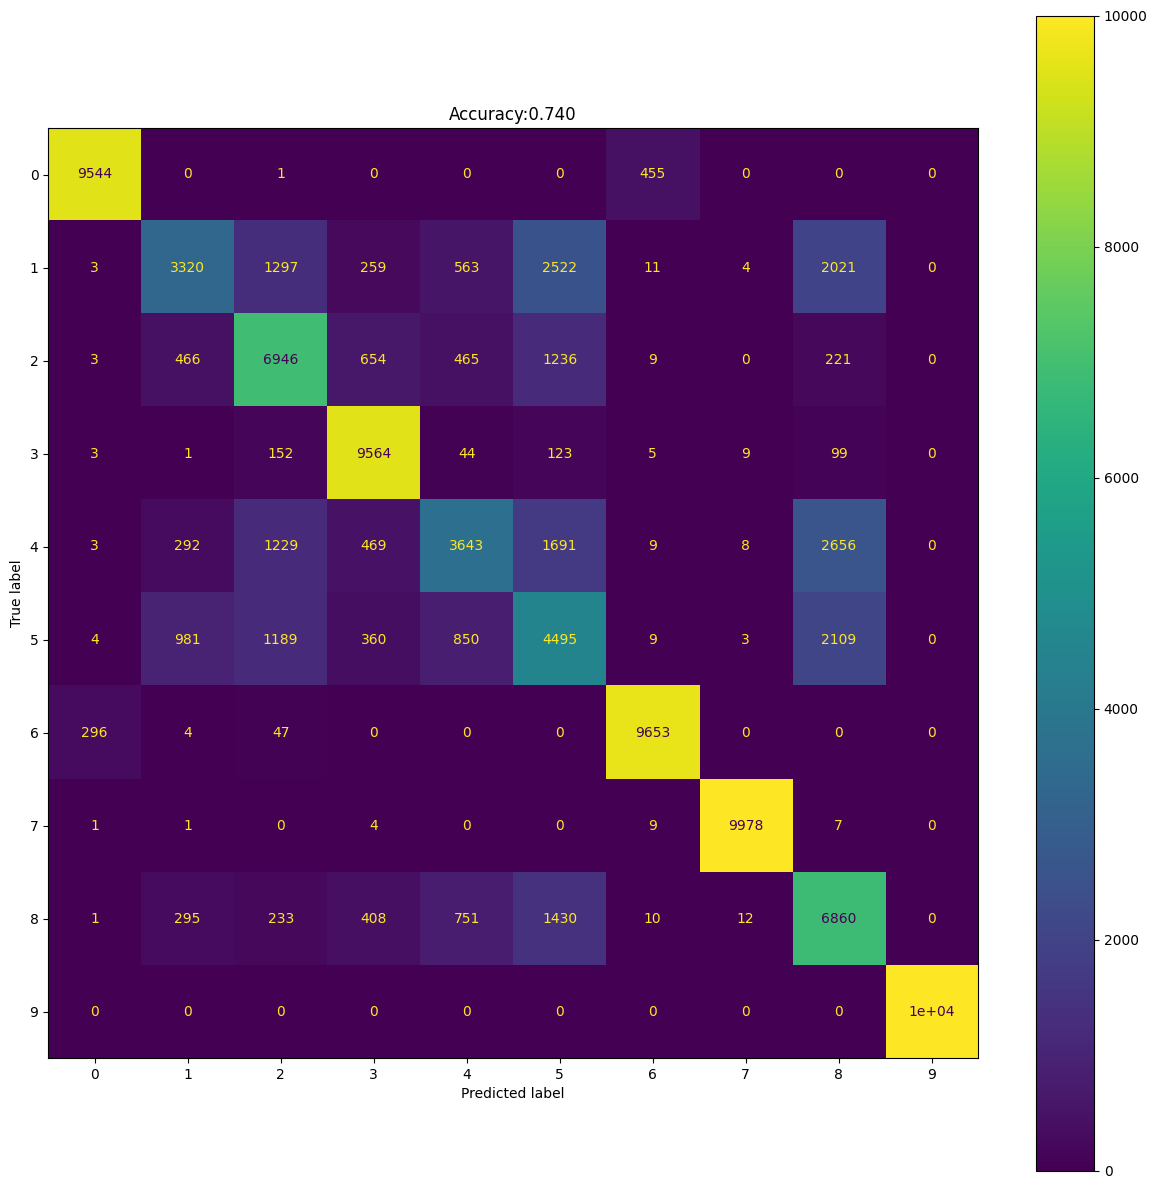

In [50]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')